# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(42)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, Input

# Data
Image Path

In [2]:
train_dir = 'train'
test_dir = 'val'

Data Rescaling and Augmentation

In [3]:
data_augmentation = Sequential([
    Input(shape=(224, 224, 3)),  # Define the input shape explicitly here
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    Rescaling(1./255)
], name="data_augmentation")

Load Datasets (Shuffle and Prefetch)

In [4]:
import tensorflow as tf

# IMG_SIZE = (112, 112)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed=42
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

class_names = test_data.class_names
valid_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


Visual Data

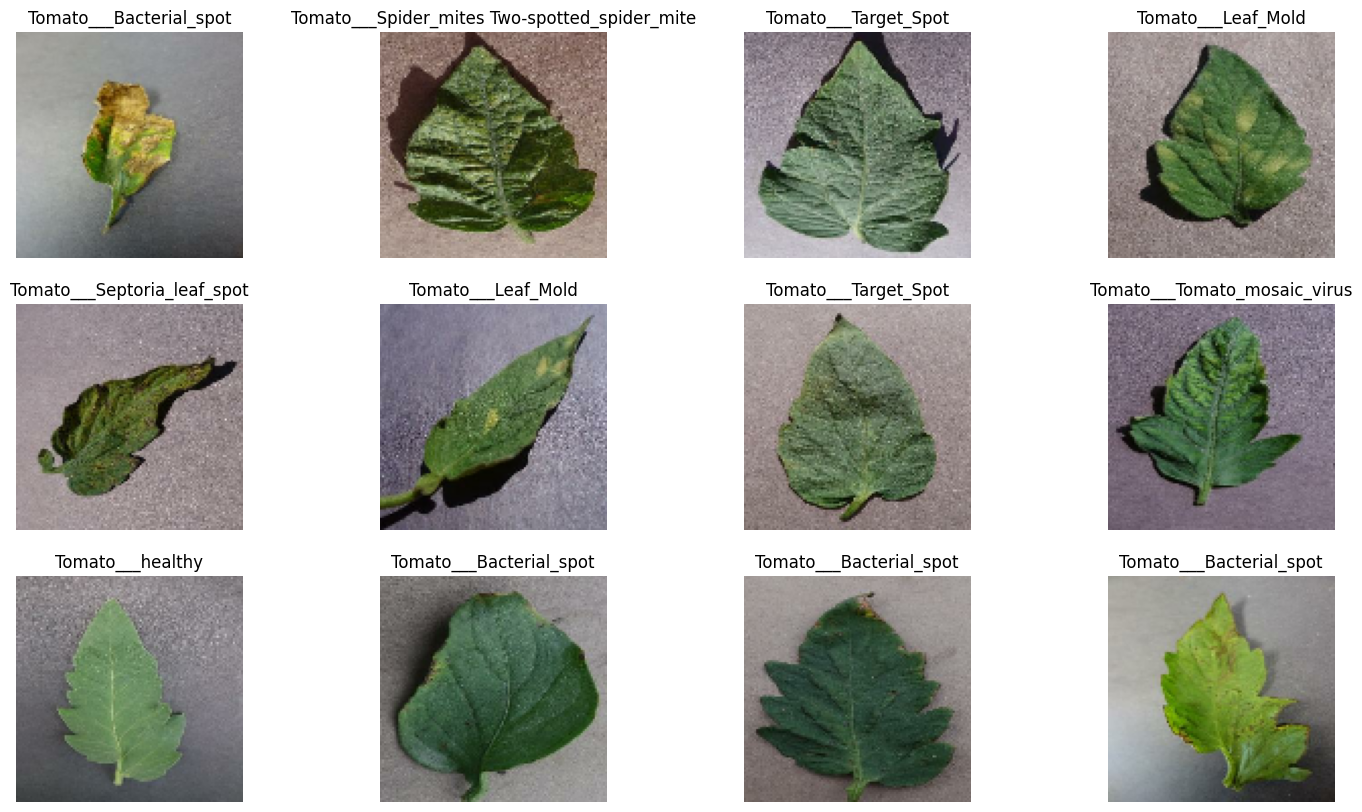

In [5]:
plt.figure(figsize=(18,10))
for image_batch,label_batch in train_data.take(1):
    for i in range(0,12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")

Augmented Image View

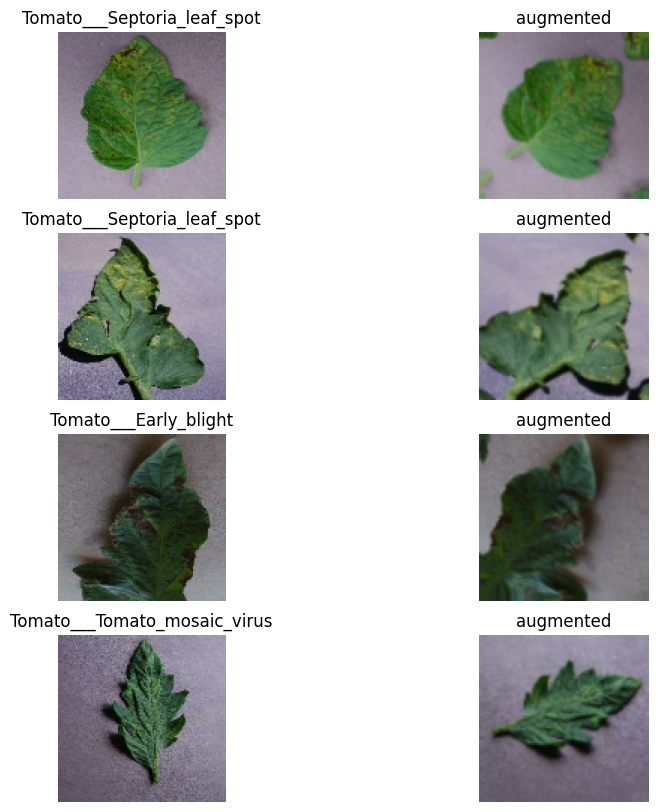

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_data.take(1):
    augmented_image_batch = data_augmentation(image_batch)
    image_plt_len = len(image_batch) if len(image_batch) < 4 else 4
    for i in range(0, image_plt_len):
        plt.subplot(image_plt_len,2,2*i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")
        plt.subplot(image_plt_len,2,2*i+2)
        plt.imshow(augmented_image_batch[i])
        plt.title(f"augmented")
        plt.axis("off")

Create Checkpoint

In [7]:
checkpoint_path = "CheckPoint/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True
)

Create Model

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input shape
#input_shape = (112, 112, 3)  # Adjust based on your dataset

model = tf.keras.Sequential([
    data_augmentation,
    Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(class_names), activation='softmax', name='output_layers')
])

Summary

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 16)    4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 16)   0         
 2D)                                                             
                                                        

Compile Model

In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

Fit the Model

In [15]:
history = model.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        checkpoint_callback
    ]
)

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 1.6073 - accuracy: 0.4112

NotFoundError: Graph execution error:

NewRandomAccessFile failed to Create/Open: data/tomato/val\Tomato___Spider_mites Two-spotted_spider_mite\Tomato___Spider_mites Two-spotted_spider_mite_original_1b43c451-503f-446e-9e31-dcfd3544fbcd___Com.G_SpM_FL 1245.JPG_30c6936b-9c7b-44bc-9739-4e3c75e641be.JPG : The system cannot find the path specified.
; No such process
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_11503]

Create plot_loss_curve function

In [12]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(12,6))
  # Plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

Plot the Model

In [13]:
plot_loss_curves(history)

NameError: name 'history' is not defined

Evaluate the Model

In [14]:
model.evaluate(test_data)

NotFoundError: Graph execution error:

NewRandomAccessFile failed to Create/Open: data/tomato/val\Tomato___Spider_mites Two-spotted_spider_mite\Tomato___Spider_mites Two-spotted_spider_mite_original_1b43c451-503f-446e-9e31-dcfd3544fbcd___Com.G_SpM_FL 1245.JPG_30c6936b-9c7b-44bc-9739-4e3c75e641be.JPG : The system cannot find the path specified.
; No such process
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_11503]